<a href="https://colab.research.google.com/github/thuhuong205201/Data_preparing/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
import math
np.random.seed(11)

In [ ]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500  # mỗi cluster có 500 điểm
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

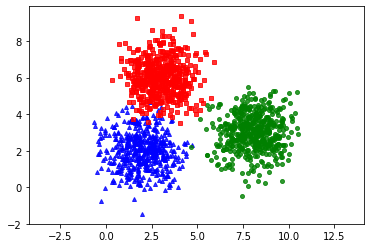

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)     # b^ : blue hình tam giác
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)     # go : green hình tròn  
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)      # rs : red square

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)


In [ ]:
points = np.vstack((X0, X1, X2)) # xếp các mảng 
points

array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       ...,
       [ 2.56402984,  5.10138061],
       [ 3.62998852,  6.60564711],
       [ 2.31894139,  6.84856953]])

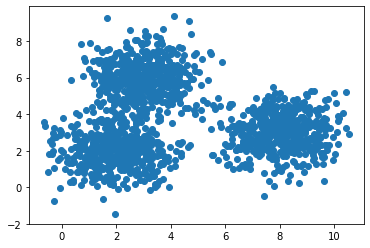

In [ ]:
plt.scatter(points[:,0], points[:,1])     # vẽ biểu đồ sự phân tán của cột 2 so với cột 1

In [ ]:
def find_tam(points, k):
  num_rand = random.sample(range(X.shape[0]), K)        # random 1 số bất kì
  tams = points[num_rand]
  return tams[:k]

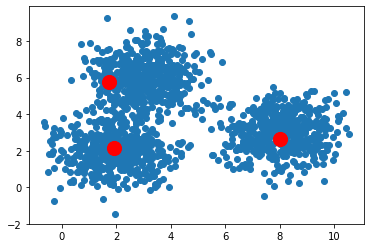

In [ ]:
plt.scatter(points[:, 0], points[:, 1])
tams = find_tam(points, 3)
plt.scatter(tams[:,0], tams[:,1], c="r",s=200)

In [ ]:
print(tams.shape)
print(points.shape)

(3, 2)
(1500, 2)


In [ ]:
def gan_tam(points, tams):
  D = cdist(tams, points)
  return np.argmin(D, axis=0)

In [ ]:
gan_tam(points, tams)

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
def update_tam(points, labels, tams):
  tams = np.zeros((K, X.shape[1]))
  for k in range(K):
    tams_new = X[labels == k, :]
    tams[k,:] = np.mean(tams_new, axis=0)
  return tams

In [ ]:
update_tam(points, gan_tam(points, tams), tams)

array([[2.00217826, 1.99666133],
       [8.01343141, 3.03559723],
       [2.93874455, 6.0418691 ]])

In [ ]:
tams

array([[1.93219177, 2.14740457],
       [8.02822789, 2.63337581],
       [1.73075131, 5.77732597]])

In [ ]:
def kMeans(points, k):
  tams = find_tam(points, k)
  running = True
  while running:
    gan_nhat = gan_tam(points, tams)
    tams_old = tams
    tams = update_tam(points, gan_nhat, tams)
    if np.all(tams_old == tams):
      running = False
    return gan_nhat, tams

In [ ]:
def k_display(points, gan_nhat, tams):
  plt.scatter(points[:,0], points[:,1], c=gan_nhat)
  plt.scatter(tams[:,0], tams[:,1], s=100, c="r")
  plt.show()

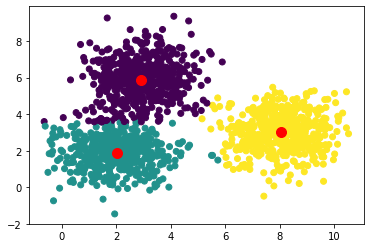

In [ ]:
gan_nhat, tams = kMeans(points, 3)
k_display(points, gan_nhat, tams)

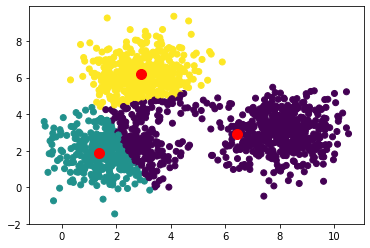

In [ ]:
gan_nhat, tams = kMeans(points, 4)
k_display(points, gan_nhat, tams)

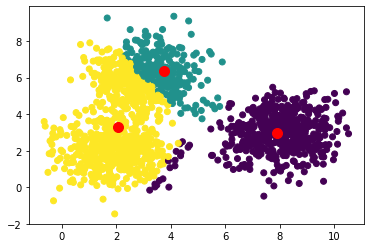

In [ ]:
gan_nhat, tams = kMeans(points, 5)
k_display(points, gan_nhat, tams)